In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/MyDeepLearning"

bhati_HW2_DeepLearning.ipynb  fashion_mnist_model.h5
bhati_HW2_ResNet.ipynb	      My_Local_system_Code.ipynb
bhati_HW2_vggnet.ipynb


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
#from tensorflow.keras.applications.vgg19 import preprocess_input
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading of Fashion Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_images.shape, train_labels.shape, test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

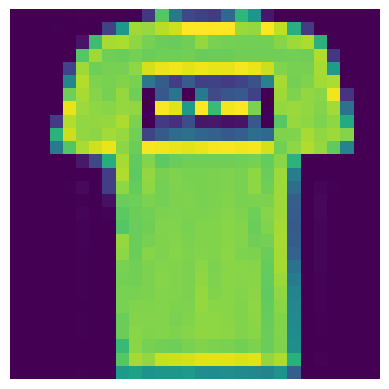

In [ ]:
some_img = train_images[1]
plt.imshow(some_img)
plt.axis('off')
plt.show()

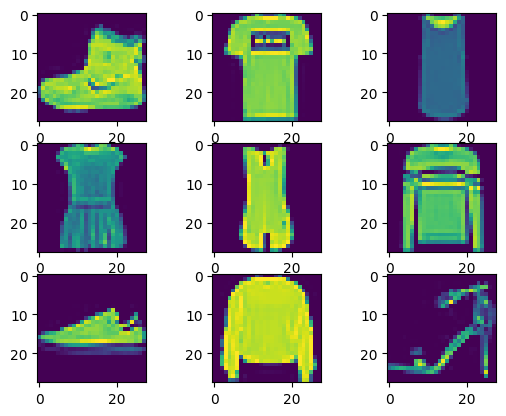

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(train_images[i])
# show the figure
plt.show()

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Problem 1**

In [ ]:
# Creating CNN from scratch using Keras with all the layers as mentioned in the HW Question
def CNN_model():

    model = keras.Sequential([

    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu',input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 4
    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 5
    layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    # Fully Connected Layer 2
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')
    ])

    return model



In [ ]:
model1 = CNN_model()

ValueError: ignored

### Creating 5 layers of Convolution with batchnormalization and maxpooling(2,2) is giving errors. For the last layer, **Maxpoolong by(2,2) was making the output dimensions negative** as the layer four output shape for maxpooling was(None, 1,1,256). So, it couldnot further reduce to negative. **Changing last layer of MAxpooling to (1,1) can fixed this issue**. **But since fourth layer has already been reduced to MaxPooling(1,1) this last maxpooling can be removed without any effect as shown below**.

In [ ]:
def cnn_model_without_maxpoollastLayer(activation, optimizer, learning_rate):

    optimizers = {
        'adam': keras.optimizers.Adam,
        'adagrad': keras.optimizers.Adagrad
    }

    model = keras.Sequential([

    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation=activation, kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation=activation,kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation=activation,kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 4
    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=activation,kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 5
    layers.Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation=activation,kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    #layers.MaxPooling2D((1, 1)),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(256, activation=activation),
    layers.Dropout(0.5),

    # Fully Connected Layer 2
    layers.Dense(128, activation=activation),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(10, activation='softmax')
    ])

    # Compile the model with adam and adagrad whichever is passed as an argument.
    model.compile(optimizer=optimizers[optimizer](learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = cnn_model_without_maxpoollastLayer('relu','adam',0.001)

In [ ]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_45 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_46 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                      

#### tf.newaxis is an alias for None in TensorFlow. It is used to increase the dimension of a tensor by one unit along a specified axis. Can be used for reshaping or expanding the dimensions of a tensor, especially as CNN expects input tensors with channel dimensions.

In [ ]:
# Train the model
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 16s 8ms/step - loss: 0.5833 - accuracy: 0.8034 - val_loss: 0.3608 - val_accuracy: 0.8669
Epoch 2/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3651 - accuracy: 0.8777 - val_loss: 0.3073 - val_accuracy: 0.8913
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3161 - accuracy: 0.8956 - val_loss: 0.2922 - val_accuracy: 0.8984
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2835 - accuracy: 0.9042 - val_loss: 0.2716 - val_accuracy: 0.9019
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2622 - accuracy: 0.9126 - val_loss: 0.2817 - val_accuracy: 0.9046
Epoch 6/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2359 - accuracy: 0.9200 - val_loss: 0.2864 - val_accuracy: 0.9030
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2180 - accuracy: 0.9272 - val_loss: 0.2879 - val_ac

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images[..., tf.newaxis], test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.3157 - accuracy: 0.9100
Test accuracy: 91.00%


Text(0, 0.5, 'Loss')

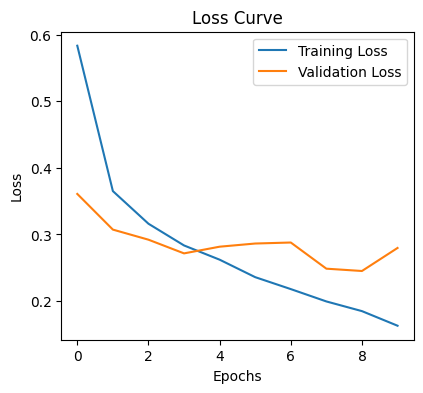

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

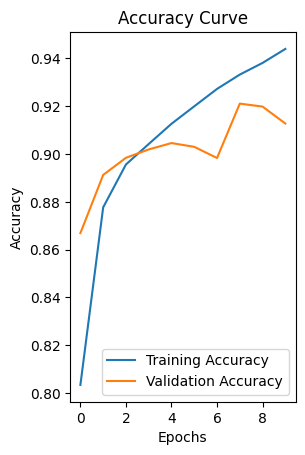

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold

### StratifiedKFold 5-Fold Cross Validation is used so that class balance is maintained across folds. A list of scores is created to store accuracy of each fold. Average accuracy and standard debiation is calculated based on the stored accuracies.


In [ ]:
# K-Fold Cross-Validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# accuracy scores list
scores = []

# Performing 5-Fold Cross Validation
for train_index, val_index in k_fold.split(train_images, train_labels):
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Creating and compiling the model
    model = cnn_model_without_maxpoollastLayer('relu','adam',0.001)

    #print(model.summary())
    # Compile the model using sparse categorical cross entropy in which uses multiple class classification with one-hot encoding
    #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    history = model.fit(X_train[..., tf.newaxis], y_train, epochs=10, validation_data=(X_val[..., tf.newaxis], y_val), verbose=0)

    # Evaluate the model on the validation data
    val_loss, val_accuracy = model.evaluate(X_val[..., tf.newaxis], y_val, verbose=0)
    print("val_accuracy", val_accuracy)
    scores.append(val_accuracy)




val_accuracy 0.9268333315849304
val_accuracy 0.9101666808128357
val_accuracy 0.9253333210945129
val_accuracy 0.921833336353302
val_accuracy 0.9184166789054871


In [ ]:
# Calculate average accuracy and standard deviation
average_accuracy = np.mean(scores)
std_deviation = np.std(scores)

# Print the results
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
print(f'Standard Deviation: {std_deviation * 100:.2f}%')


Average Accuracy: 92.05%
Standard Deviation: 0.59%


## **Using Stratified 5-Fold the accuracy is improved by 1% from 91% to 92.05%**

**Hyperparameter Tuning**

In [ ]:
# Different Hyperparameters

activation_funcs = ['relu', 'LeakyReLU']
optimizer = ['adam', 'adagrad']
mini_batch_size = [16, 32, 64]
learning_rate = [0.001, 0.0001, 0.00001]

In [ ]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Hyperparameters', 'Test Accuracy'])
best_accuracy = 0
best_hyperparameters = None

### Loop over each hyperparameter list to fetch all possible combinations

In [ ]:
for act in activation_funcs:
    for opt in optimizer:
        for batchsize in mini_batch_size:
            for l_rate in learning_rate:
                # Build the CNN model with the current hyperparameters
                model = cnn_model_without_maxpoollastLayer(act, opt, l_rate)

                # Train the model
                history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=10, batch_size=batchsize, verbose=0)

                # Evaluate the model on the test data
                test_loss, test_accuracy = model.evaluate(test_images[..., tf.newaxis], test_labels, verbose=0)

                # Store the hyperparameters and accuracy in the DataFrame
                results_df = results_df.append({'Hyperparameters': (act, opt, batchsize, l_rate), 'Test Accuracy': test_accuracy}, ignore_index=True)
                #print(results_df)

                # Check if this combination resulted in the best accuracy so far
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_hyperparameters = (act, opt, batchsize, l_rate)
                    #print(best_hyperparameters,best_accuracy)

In [ ]:
# Display the DataFrame with all results
print("\nDataFrame with Results of all 36 combinations of hyperparameters:")
results_df.sort_values(by=['Test Accuracy'], ascending=False)


DataFrame with Results of all 36 combinations of hyperparameters:


,Hyperparameters,Test Accuracy
24,"(LeakyReLU, adam, 64, 0.001)",0.9206
0,"(relu, adam, 16, 0.001)",0.9184
18,"(LeakyReLU, adam, 16, 0.001)",0.9173
21,"(LeakyReLU, adam, 32, 0.001)",0.9172
1,"(relu, adam, 16, 0.0001)",0.9113
3,"(relu, adam, 32, 0.001)",0.9108
6,"(relu, adam, 64, 0.001)",0.9087
19,"(LeakyReLU, adam, 16, 0.0001)",0.9075
4,"(relu, adam, 32, 0.0001)",0.9032
7,"(relu, adam, 64, 0.0001)",0.9029


In [ ]:
# Print the results
print("Best Hyperparameters:")
print("\nActivation function, Optimizer, Mini-batch size, Learning rate:=> ",best_hyperparameters)
print("\nTest Accuracy:", best_accuracy)

Best Hyperparameters:

Activation function, Optimizer, Mini-batch size, Learning rate:=>  ('LeakyReLU', 'adam', 64, 0.001)

Test Accuracy: 0.9205999970436096


The **worst performance is given by learning rate of 0.00001** as the learning is so slow that within 10 epochs it is no where near minima. Same for 0.0001 learning rate, the learning rate is less that in 10 epochs it is still not reaching minima. **0.001 seems to be better**. **LeakyRelU that helps with the problem of vanishing gradient is showing better results than ReLU**. **Adam is performing better than Adagrad** here. In general also **Adam performs better** as it **combines** both techniques of **maintaining exponential moving averages of gradients** of parameters to update parameters and **updating the learning rate** of each parameter based on the **previous gradient information**. **Adagrad just uses the updation of learning rate based on the past gradient information**.

## check dataset class distribution

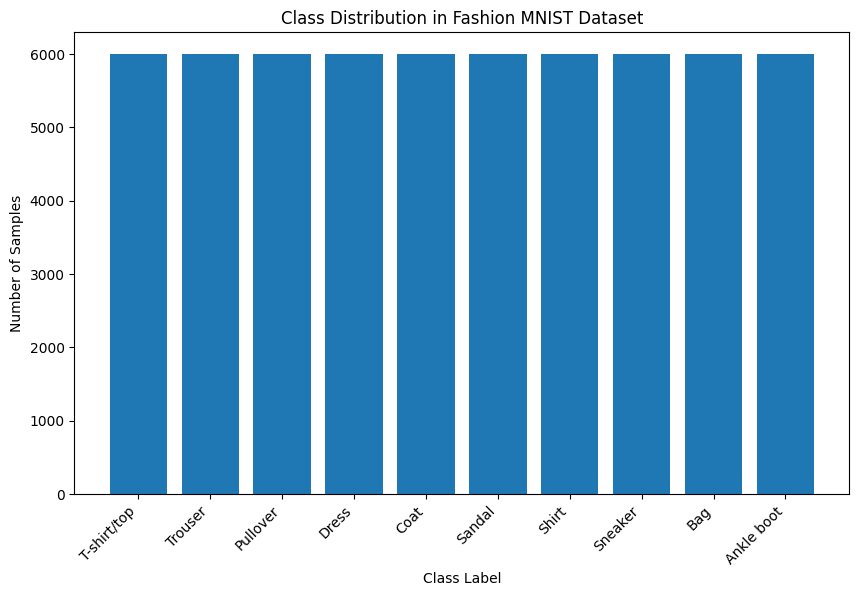

In [ ]:
# Calculate the number of samples in each class
class_counts = np.bincount(train_labels)

# Define class labels (0 to 9)
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot the class distribution
plt.figure(figsize=(6, 6))
plt.bar(class_labels, class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Fashion MNIST Dataset")
plt.xticks(rotation=45, ha="right")

plt.show()

In [ ]:
pd.Series(train_labels).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

### Classes are equally distributed. But for the sake of learning we will emply Data Augmentation

### Data Augmentation using rotation, width and height shifting, shear, flip,zoom

In [ ]:
train_images.shape # grey scale image..will need to increase the dimension to input into tensor

(60000, 28, 28)

Using **ImageDataGenerator** with 6 Augmentation techniques - **Rotation, width shift, Height Shift, transparency, Zoom, Horizontal flip**

In [ ]:
# Creating an instance of the ImageDataGenerator with augmentation settings
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,      # Randomly rotate images by up to 25 degrees
    width_shift_range=0.15,  # Shift images horizontally by up to 15% of the width
    height_shift_range=0.15, # Shift images vertically by up to 15% of the height
    shear_range=0.10,        # Shear intensity (shear angle in radians)
    zoom_range=0.25,         # Zoom into images by up to 25%
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels after rotation or shifting
)

augmented_train_images = [] # augmented images list

for i in range(len(train_images)): # Appling data augmentation to each of the training image
    image = train_images[i]
    image = np.expand_dims(image, axis=-1)  # Adding channel dimension (1 channel for grayscale)
    augmented_image = datagen.random_transform(image)
    augmented_train_images.append(augmented_image)

# Converting the list of augmented images back to a numpy array
augmented_train_images = np.array(augmented_train_images)

model = cnn_model_without_maxpoollastLayer('relu', 'adam', 0.001)


## call using LeakyReLU with batch size 64 keeping other parameters same didnot give good results (81.5%) on the augmented dataset. Instead using relu with batch_size 32.

In [ ]:
# Training the CNN model on the augmented data
history_augmented = model.fit(augmented_train_images,train_labels, epochs=10, validation_split=0.2, batch_size=32)

# Evaluating the model on the test data
test_loss_augmented, test_accuracy_augmented = model.evaluate(test_images[..., tf.newaxis],test_labels, verbose=0)


Epoch 1/10
1500/1500 [==============================] - 17s 8ms/step - loss: 1.0142 - accuracy: 0.6324 - val_loss: 0.6693 - val_accuracy: 0.7422
Epoch 2/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.7186 - accuracy: 0.7341 - val_loss: 0.6329 - val_accuracy: 0.7573
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.6354 - accuracy: 0.7683 - val_loss: 0.5720 - val_accuracy: 0.7846
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5733 - accuracy: 0.7972 - val_loss: 0.5384 - val_accuracy: 0.8110
Epoch 5/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5269 - accuracy: 0.8133 - val_loss: 0.5746 - val_accuracy: 0.7906
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4819 - accuracy: 0.8306 - val_loss: 0.5516 - val_accuracy: 0.7922
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4474 - accuracy: 0.8424 - val_loss: 0.5180 - val_ac

In [ ]:
# the testing accuracy after data augmentation
print("Test Accuracy with Data Augmentation:", test_accuracy_augmented)

Test Accuracy with Data Augmentation: 0.8378999829292297
